In [12]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
file = open('statistics.json')
df = pd.DataFrame(json.load(file)["benchmarks"])

In [22]:
split_str = df["run_name"].str.split("/")
df["size"] = split_str.str[1].astype(int)
df["probability"] = split_str.str[2].astype(int)
df["components"] = split_str.str[3].astype(int)
df = df[["size", "probability", "components", "cpu_time"]]

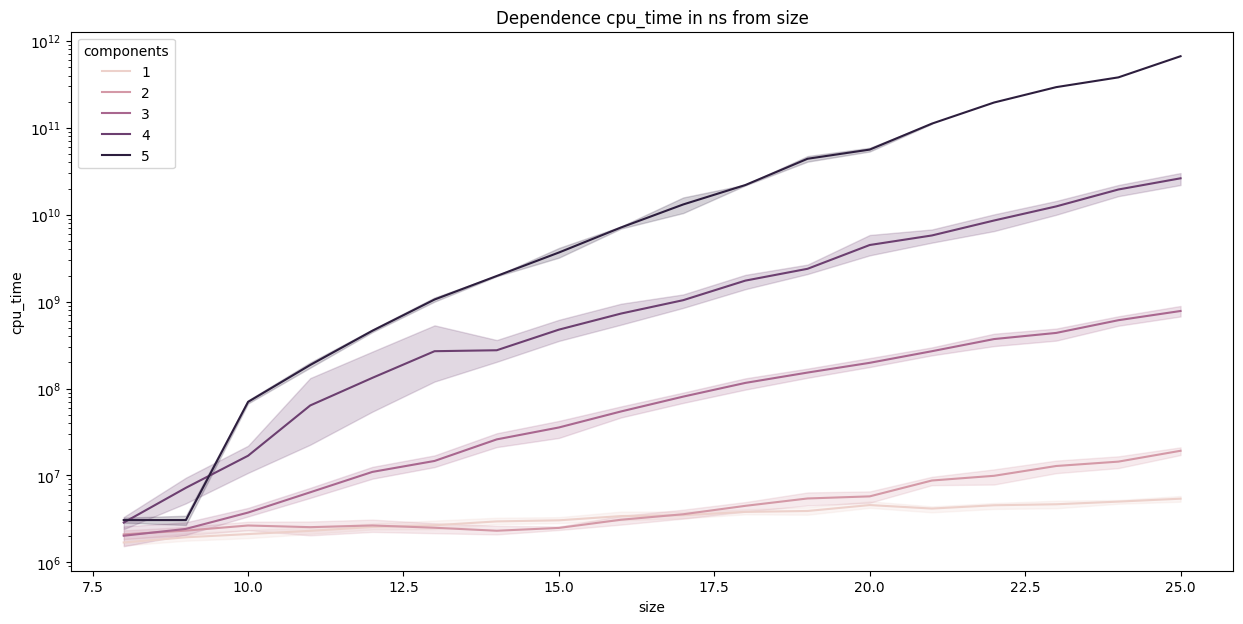

In [15]:
plt.figure(figsize=(15,7))
sns.lineplot(df, x="size", y="cpu_time", hue="components")
plt.title('Dependence cpu_time in ns from size')
plt.yscale('log')

По графику видно, что с увеличением компонент, время работы сильно увеличивается, кроме того полиномиальный алгоритм работает за $O(n^{2*c - 2} * n ^ 3)$, где c - количество компонент связности и мы видим, что это +- согласуется с полученными результатами.

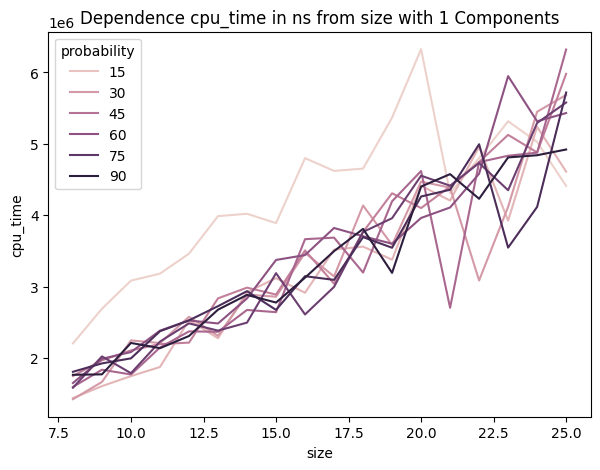

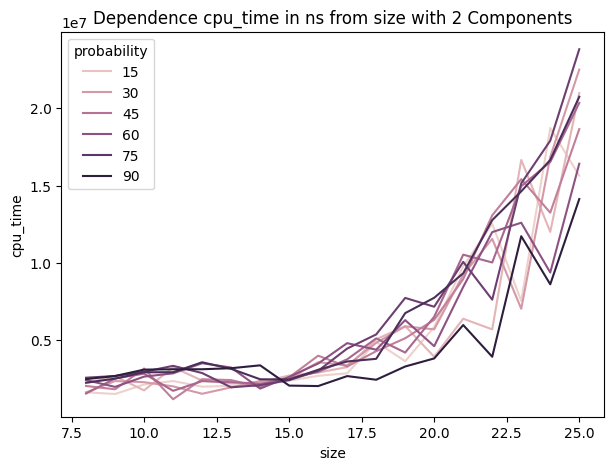

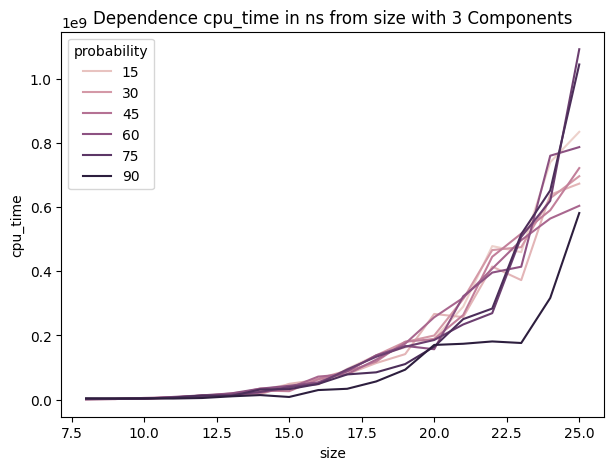

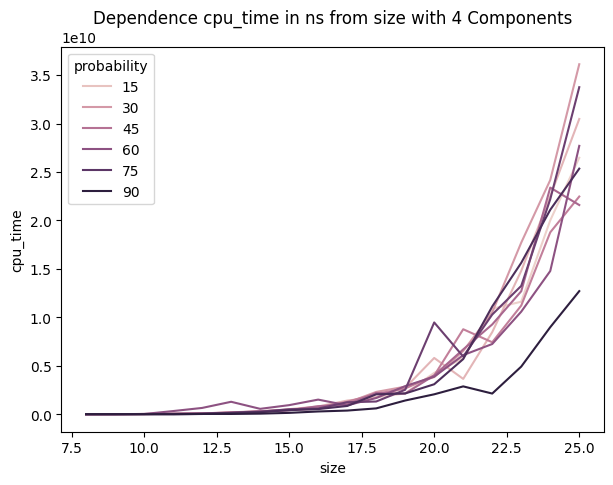

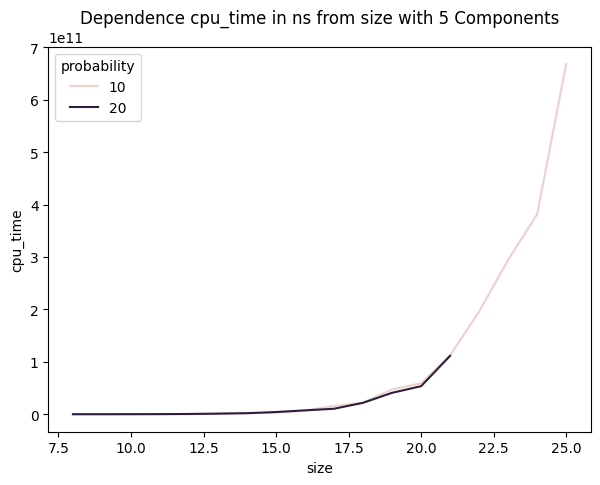

In [16]:
max_components = 5
for i in range(max_components):
    plt.figure(figsize=(7,5))
    plt.title('Dependence cpu_time in ns from size with ' + str(i + 1) + ' Components')
    sns.lineplot(df[df["components"] == (i + 1)], x="size", y="cpu_time", hue="probability")

Из графиков видно, что время работы алгоритма не зависит от того, на сколько много рёбер на n вершинах, так как в алгоритме мы достраиваем наш граф до полного графа

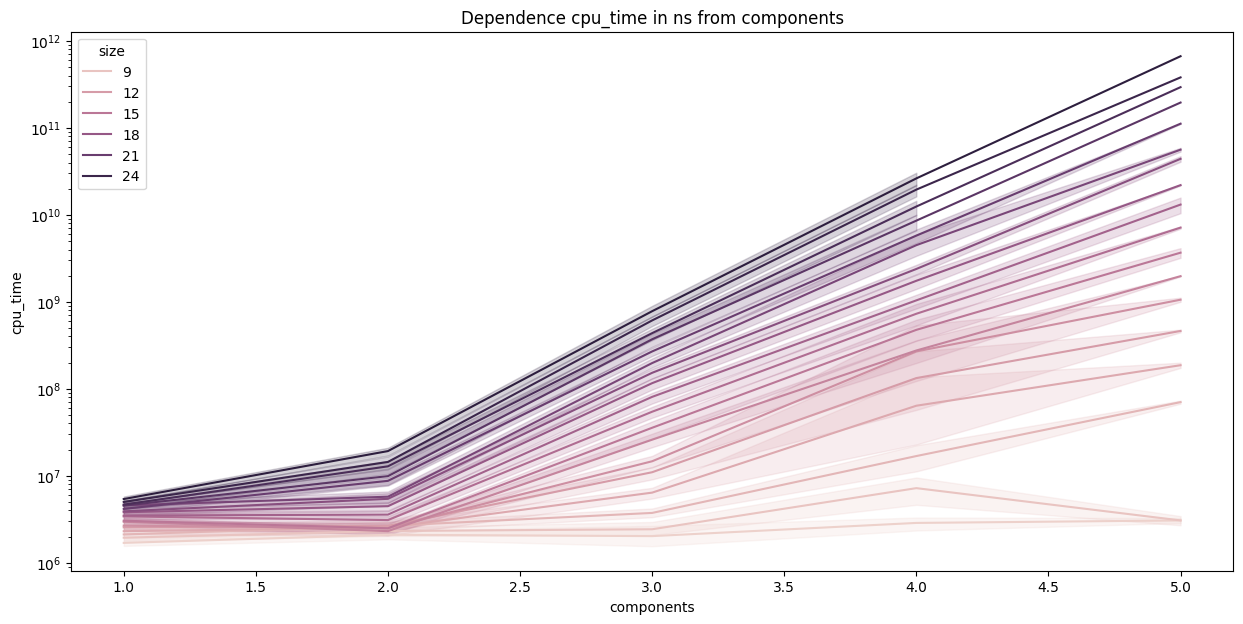

In [19]:
plt.figure(figsize=(15,7))
sns.lineplot(df, x="components", y="cpu_time", hue="size")
plt.title('Dependence cpu_time in ns from components')
plt.yscale('log')

Здесь прослеживается линейная зависимость времени работы (в log шкале) в зависимости от количества компонент связности при определённом размере, что опять же подтверждает нашу асимптотику $O(n^{2*c - 2} * n ^ 3)$

__Вывод__ Можно сделать вывод, что алгоритм эффективно работает, если количество компонент связности в графе, образованном из рёбер, которые надо посетить, маленькое, а так же время работы алгоритма не зависит от плотности графа